In [1]:
from geopi import GeoPi
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import folium
import time

geopi = GeoPi()

lat, lng = 32.043787, 118.797437

# 查询经纬度为位置所在的省市区
start_time = time.time()
ret = geopi.search_city(lat, lng)
end_time = time.time()

elapsed_time = (end_time - start_time) * 1000
print(f"Executed in {elapsed_time:.2f} ms")
print(ret)

Executed in 2.17 ms
{'province': ['江苏省', '320000'], 'city': ['南京市', '320100'], 'area': ['玄武区', '320102']}


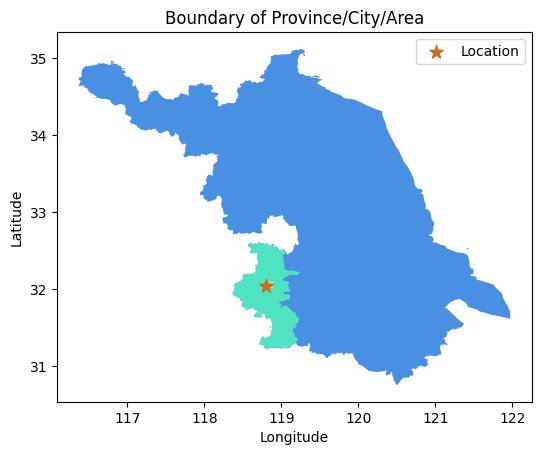

In [2]:
# 获取经纬度坐标所在区域的边界数据
province_boundary = geopi.get_boundary_data(ret['province'][1])
city_boundary = geopi.get_boundary_data(ret['city'][1])
area_boundary = geopi.get_boundary_data(ret['area'][1])

gdf = GeoDataFrame({'geometry': [province_boundary, city_boundary, area_boundary]}, index=['province', 'city', 'area'])
ax = gdf.plot(color=['#4A90E2', '#50E3C2', '#B8E986'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Boundary of Province/City/Area')

# 在地图上绘制经纬度位置点
plt.scatter(lng, lat, color='#D2691E', marker='*', s=100, zorder=10, label='Location')
ax.legend()

In [3]:
# 查询经纬度位置附近的POI信息
start_time = time.time()
ret = geopi.search_nearest_poi(lat, lng, topk=10)
end_time = time.time()

elapsed_time = (end_time - start_time) * 1000
print(f"Executed in {elapsed_time:.2f} ms")
ret.head(10)

Executed in 161.41 ms


/home/wangkang/GitHub/geopi/geopi/geopi.py:170: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['dist'] = gdf.wgs84.distance(pt)


,osm_id,code,fclass,name,wgs84,gcj,dist
568,5676754221,2722,museum,总统府,POINT (118.79235 32.04509),POINT (118.79754 32.04302),0.000771
884,7986522913,2301,restaurant,Bellagio,POINT (118.79036 32.04540),POINT (118.79555 32.04334),0.001940
1067,11484513313,2303,cafe,茶颜悦色,POINT (118.79032 32.04553),POINT (118.79551 32.04347),0.001958
422,4539532000,2303,cafe,星巴克,POINT (118.79024 32.04555),POINT (118.79543 32.04349),0.002031
421,4539531999,2303,cafe,Costa咖啡,POINT (118.79011 32.04548),POINT (118.79530 32.04341),0.002171
868,7985408452,2305,bar,Commune,POINT (118.79171 32.04809),POINT (118.79691 32.04603),0.002301
406,4441508789,2301,restaurant,Sta Food,POINT (118.79237 32.04833),POINT (118.79756 32.04626),0.002481
1068,11484552961,2303,cafe,霸王茶姬,POINT (118.79112 32.04808),POINT (118.79631 32.04602),0.002498
418,4449221089,2701,tourist_info,总统府集合点,POINT (118.79119 32.04346),POINT (118.79638 32.04140),0.002611
587,6110227439,2082,school,南京外国语学校国际部及初三年级校区,POINT (118.78965 32.04631),POINT (118.79484 32.04425),0.002638


In [4]:
map = folium.Map(location=[lat, lng], 
           tiles='https://webrd02.is.autonavi.com/appmaptile?lang=zh_en&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
           attr='高德-中英文对照',
           zoom_start=15)
folium.Marker(location=[lat, lng], icon=folium.Icon(color='red')).add_to(map)

for index, row in ret.iterrows():
    pt = row['gcj']
    folium.Marker(location=[pt.y, pt.x], icon=folium.Icon(color='blue'), popup=row['name']).add_to(map)
map

In [11]:
from coord_convert.transform import wgs2gcj, wgs2bd, gcj2wgs, gcj2bd, bd2wgs, bd2gcj 

# 将 GCJ-02 转换为 WGS84 坐标系
wgs_lng, wgs_lat = gcj2wgs(lng, lat)
map = folium.Map(location=[wgs_lat, wgs_lng], zoom_start=15)
folium.Marker(location=[wgs_lat, wgs_lng], icon=folium.Icon(color='red')).add_to(map)
map

In [12]:
wgs_lat, wgs_lng = 32.04635, 118.79237

# 将 WGS84 转换为 GCJ-02 坐标系
gcj_lng, gcj_lat = wgs2gcj(wgs_lng, wgs_lat)

map = folium.Map(location=[gcj_lat, gcj_lng], 
           tiles='https://webrd02.is.autonavi.com/appmaptile?lang=zh_en&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
           attr='高德-中英文对照',
           zoom_start=15)
folium.Marker(location=[gcj_lat, gcj_lng], icon=folium.Icon(color='red')).add_to(map)
map

In [20]:
wgs_lat, wgs_lng = 32.0638095, 118.775203
gcj_lng, gcj_lat = wgs2gcj(wgs_lng, wgs_lat)
print(wgs_lat, wgs_lng)
print(gcj_lat, gcj_lon)

32.0638095 118.775203
32.0617596987346 118.775203
